# Wind Mill Power Prediction
## Importing Necessary Libraries

In [1]:
# Importing Necessary Libraries
import numpy as np              # linear algebra
import pandas as pd             # data processing, CSV file I/O
import matplotlib.pyplot as plt # data visualization
import seaborn as sns           # statistical data visualization
import joblib                   # model saving/loading
from sklearn.model_selection import train_test_split  # splitting data

import warnings
warnings.filterwarnings('ignore')

## Step 1: Load and Analyze the Dataset
Import the dataset as a DataFrame and rename columns for better readability.

In [2]:
# Loading the training dataset
path = "data/train.csv"
df = pd.read_csv(path)

# Rename columns for better understanding
df.rename(columns={
    'tracking_id': 'ID',
    'datetime': 'DateTime',
    'wind_speed(m/s)': 'WindSpeed',
    'atmospheric_temperature(°C)': 'AtmosphericTemp',
    'shaft_temperature(°C)': 'ShaftTemp',
    'blades_angle(°)': 'BladesAngle',
    'gearbox_temperature(°C)': 'GearboxTemp',
    'engine_temperature(°C)': 'EngineTemp',
    'motor_torque(N-m)': 'MotorTorque',
    'generator_temperature(°C)': 'GeneratorTemp',
    'atmospheric_pressure(Pascal)': 'AtmosphericPressure',
    'area_temperature(°C)': 'AreaTemp',
    'windmill_body_temperature(°C)': 'WindmillBodyTemp',
    'wind_direction(°)': 'WindDirection',
    'resistance(ohm)': 'Resistance',
    'rotor_torque(N-m)': 'RotorTorque',
    'turbine_status': 'TurbineStatus',
    'cloud_level': 'CloudLevel',
    'blade_length(m)': 'BladeLength',
    'blade_breadth(m)': 'BladeBreadth',
    'windmill_height(m)': 'WindmillHeight',
    'windmill_generated_power(kW/h)': 'Power_kWh'
}, inplace=True)

print(f"Dataset Shape: {df.shape}")
print(f"Total Rows: {df.shape[0]}, Total Columns: {df.shape[1]}")
df.head()

Dataset Shape: (28200, 22)
Total Rows: 28200, Total Columns: 22


,ID,DateTime,WindSpeed,AtmosphericTemp,ShaftTemp,BladesAngle,GearboxTemp,EngineTemp,MotorTorque,GeneratorTemp,...,WindmillBodyTemp,WindDirection,Resistance,RotorTorque,TurbineStatus,CloudLevel,BladeLength,BladeBreadth,WindmillHeight,Power_kWh
0,WM_33725,2019-08-04 14:33:20,94.820023,-99.000000,41.723019,-0.903423,82.410573,42.523015,2563.124522,76.665560,...,NaN,239.836388,2730.310605,42.084666,BA,Medium,2.217542,0.314065,24.281689,6.766521
1,WM_698,2018-11-05 10:13:20,241.832734,27.764785,-99.000000,-99.000000,44.104919,46.258870,2372.384119,78.129803,...,NaN,337.944723,1780.207200,107.888643,A2,Medium,4.210346,0.448494,27.262139,5.966275
2,WM_39146,2019-09-14 14:03:20,95.484724,NaN,41.855473,12.652763,42.322098,42.878552,1657.169646,67.654469,...,45.033197,227.850294,1666.049900,-42.931459,ABC,Medium,2.719475,0.302321,27.366127,2.874342
3,WM_6757,2018-12-25 15:33:20,238.819424,-99.000000,45.443914,15.115323,44.759643,47.282101,2888.134079,95.389974,...,44.827154,492.081520,1964.502895,42.744596,ABC,NaN,4.857385,0.367140,24.287767,14.851089
4,WM_21521,2019-05-04 03:13:20,10.722890,NaN,41.981183,1.715696,-17.616459,43.469852,781.695419,37.423065,...,-99.000000,259.274601,1177.516152,13.387289,AAA,Medium,NaN,0.453374,27.971650,3.519074


In [3]:
# Basic info about the dataset
print("=" * 50)
print("DATASET INFO")
print("=" * 50)
df.info()
print("\n")
print("=" * 50)
print("STATISTICAL SUMMARY")
print("=" * 50)
df.describe()

DATASET INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28200 entries, 0 to 28199
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   28200 non-null  object 
 1   DateTime             28200 non-null  object 
 2   WindSpeed            27927 non-null  float64
 3   AtmosphericTemp      24750 non-null  float64
 4   ShaftTemp            28198 non-null  float64
 5   BladesAngle          27984 non-null  float64
 6   GearboxTemp          28199 non-null  float64
 7   EngineTemp           28188 non-null  float64
 8   MotorTorque          28176 non-null  float64
 9   GeneratorTemp        28188 non-null  float64
 10  AtmosphericPressure  25493 non-null  float64
 11  AreaTemp             28200 non-null  float64
 12  WindmillBodyTemp     25837 non-null  float64
 13  WindDirection        23097 non-null  float64
 14  Resistance           28199 non-null  float64
 15  RotorTorque          27

,WindSpeed,AtmosphericTemp,ShaftTemp,BladesAngle,GearboxTemp,EngineTemp,MotorTorque,GeneratorTemp,AtmosphericPressure,AreaTemp,WindmillBodyTemp,WindDirection,Resistance,RotorTorque,BladeLength,BladeBreadth,WindmillHeight,Power_kWh
count,27927.000000,24750.000000,28198.000000,27984.000000,28199.000000,28188.000000,28176.000000,28188.000000,2.549300e+04,28200.000000,25837.000000,23097.000000,28199.000000,27628.000000,23107.000000,28200.000000,27657.000000,27993.000000
mean,69.037071,0.383727,40.085387,-9.654038,41.027755,42.614239,1710.819803,65.027857,5.318506e+04,32.735091,20.799761,306.888883,1575.560011,25.849894,2.254034,0.397249,25.887052,6.130529
std,76.275645,44.278534,27.204430,47.918161,43.663605,6.124546,827.205537,19.816499,1.875036e+05,7.703391,54.356431,134.055900,483.326394,32.423943,11.275602,0.061158,7.773609,2.697520
min,-496.211029,-99.000000,-99.000000,-146.259543,-244.974098,3.167151,500.000000,33.893779,-1.188624e+06,-30.000000,-999.000000,0.000000,-1005.222988,-136.732217,-99.000000,0.200111,-30.295253,0.962305
25%,20.883502,7.948900,41.633238,-1.197652,40.557952,41.911365,870.340239,41.198509,1.679492e+04,27.311644,40.448386,238.627752,1268.134043,13.722808,2.544859,0.347445,24.447658,4.059505
50%,93.302129,16.102410,43.686082,-0.495608,43.221735,43.525297,2031.849540,70.729533,1.819113e+04,32.605195,42.786832,271.427656,1678.238404,32.977192,3.453333,0.398591,25.957739,5.764710
75%,95.268058,23.687285,45.673685,5.495030,45.879425,45.174246,2462.585729,78.945849,1.181133e+05,38.232387,44.494543,404.153517,1829.054007,41.550520,4.357862,0.449354,27.477854,7.947195
max,601.455670,80.217444,169.820455,165.932123,999.000000,50.000000,3000.000000,100.000000,1.272552e+06,55.000000,323.000000,569.966479,4693.481933,236.883264,18.209800,0.499975,78.351335,20.175358


In [4]:
# Check for missing values
print("Missing Values per Column:")
print("-" * 40)
print(df.isnull().sum())
print(f"\nTotal Missing Values: {df.isnull().sum().sum()}")

Missing Values per Column:
----------------------------------------
ID                        0
DateTime                  0
WindSpeed               273
AtmosphericTemp        3450
ShaftTemp                 2
BladesAngle             216
GearboxTemp               1
EngineTemp               12
MotorTorque              24
GeneratorTemp            12
AtmosphericPressure    2707
AreaTemp                  0
WindmillBodyTemp       2363
WindDirection          5103
Resistance                1
RotorTorque             572
TurbineStatus          1759
CloudLevel              276
BladeLength            5093
BladeBreadth              0
WindmillHeight          543
Power_kWh               207
dtype: int64

Total Missing Values: 22614


## Step 2: Data Visualization & Correlation Analysis
Check the correlation between columns for **dimensionality reduction** — identifying which columns are necessary and which are not.

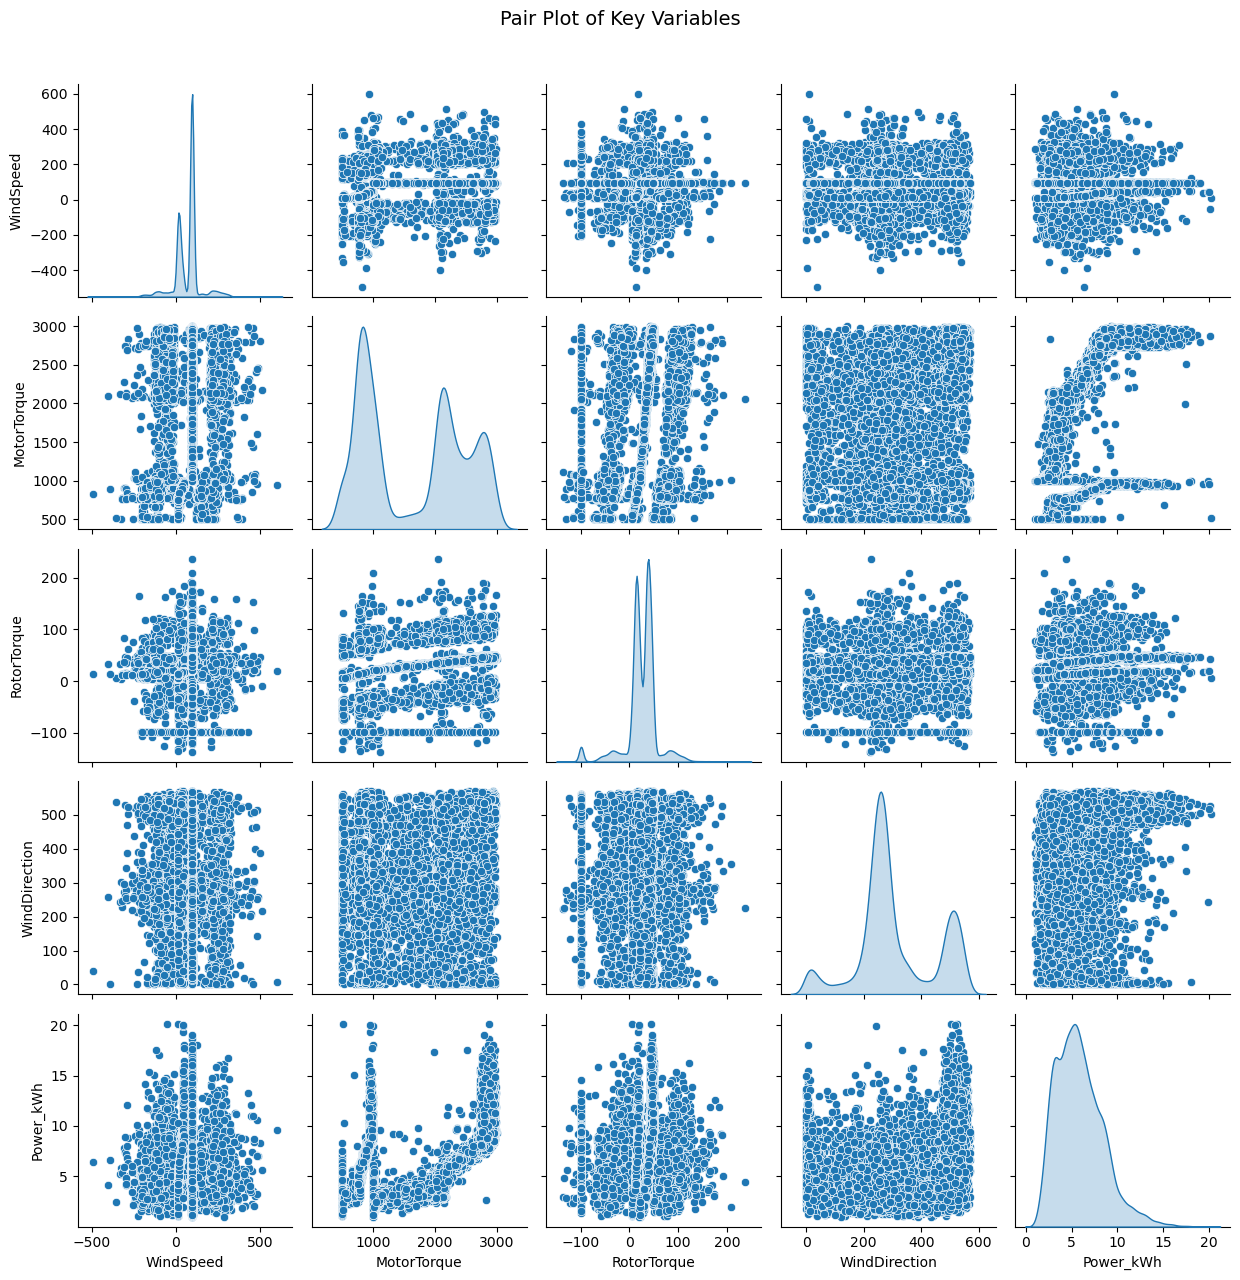

In [5]:
# Pair plot - each variable plotted against all other variables
# Using only the most relevant numeric columns for readability
key_cols = ['WindSpeed', 'MotorTorque', 'RotorTorque', 'WindDirection', 'Power_kWh']
sns.pairplot(df[key_cols].dropna(), diag_kind='kde')
plt.suptitle("Pair Plot of Key Variables", y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

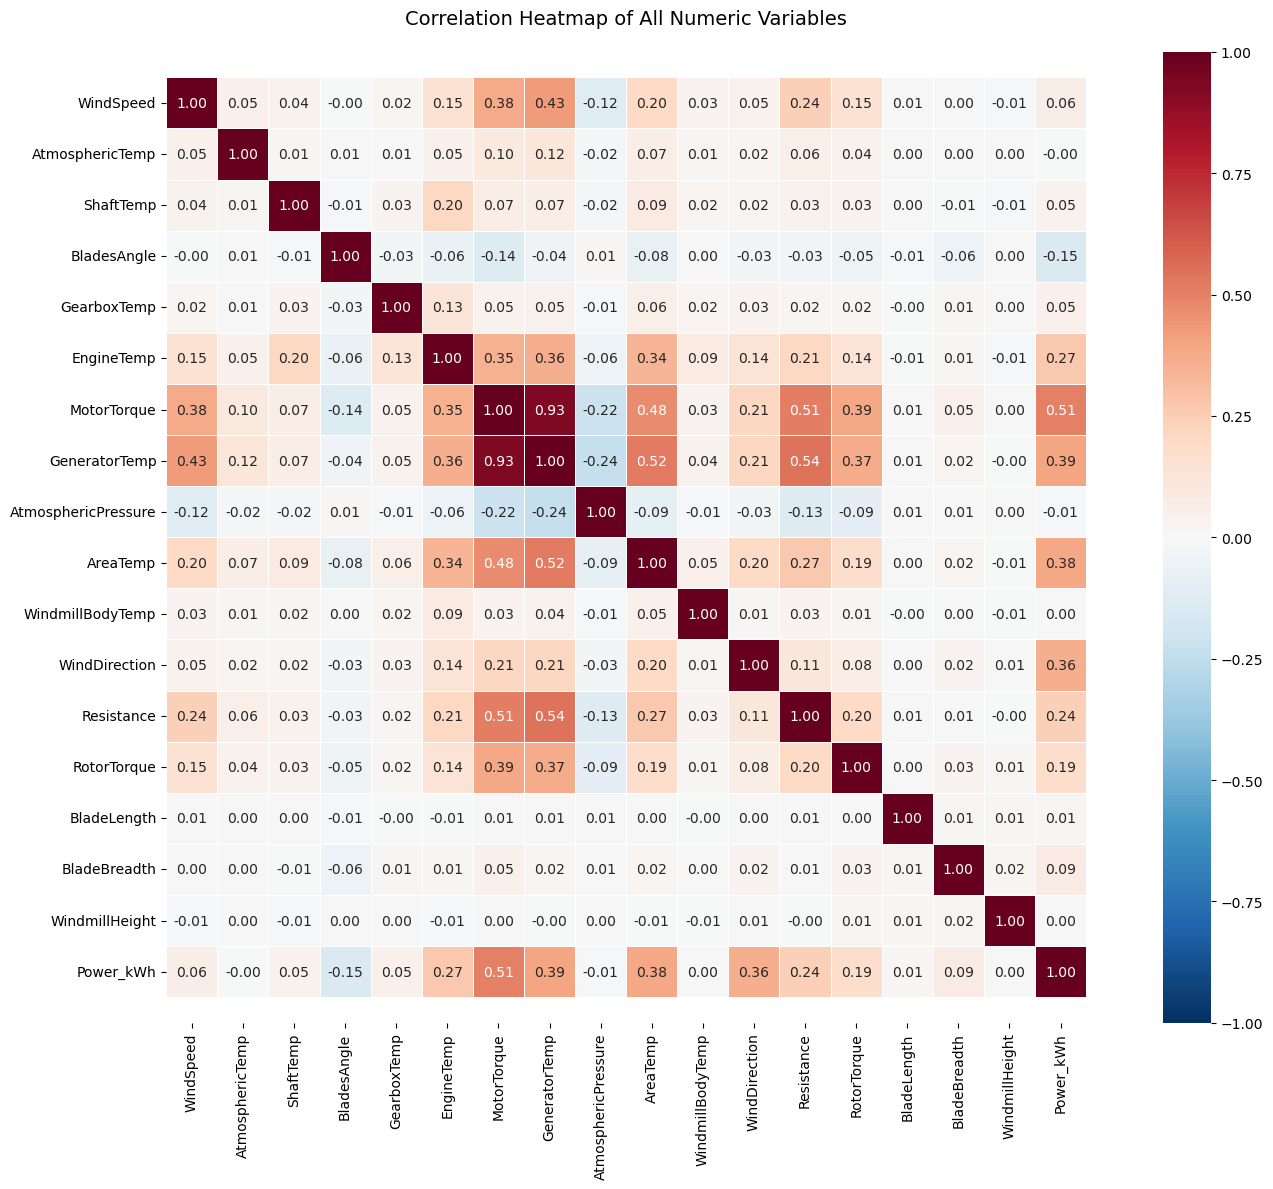

In [6]:
# Correlation Heatmap - to identify relationships between variables
plt.figure(figsize=(16, 12))
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()

ax = sns.heatmap(corr, vmin=-1, vmax=1, annot=True, fmt='.2f',
                 cmap='RdBu_r', linewidths=0.5, square=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Correlation Heatmap of All Numeric Variables", fontsize=14, pad=20)
plt.tight_layout()
plt.show()

In [7]:
# Print numerical correlation values with the target variable (Power_kWh)
print("Correlation of each feature with Power_kWh (Target):")
print("=" * 55)
power_corr = corr['Power_kWh'].drop('Power_kWh').sort_values(ascending=False)
for feature, value in power_corr.items():
    bar = '█' * int(abs(value) * 20)
    print(f"{feature:>25s} : {value:+.4f}  {bar}")  

Correlation of each feature with Power_kWh (Target):
              MotorTorque : +0.5056  ██████████
            GeneratorTemp : +0.3918  ███████
                 AreaTemp : +0.3846  ███████
            WindDirection : +0.3596  ███████
               EngineTemp : +0.2726  █████
               Resistance : +0.2400  ████
              RotorTorque : +0.1875  ███
             BladeBreadth : +0.0859  █
                WindSpeed : +0.0628  █
              GearboxTemp : +0.0532  █
                ShaftTemp : +0.0466  
              BladeLength : +0.0143  
           WindmillHeight : +0.0039  
         WindmillBodyTemp : +0.0032  
          AtmosphericTemp : -0.0010  
      AtmosphericPressure : -0.0133  
              BladesAngle : -0.1548  ███


### Observation from Heatmap:
- **Wind Direction** has very **low/no correlation** with Power generated → can be dropped.
- **WindSpeed**, **MotorTorque**, and **RotorTorque** show a **strong positive correlation** with Power generated.
- These highly correlated features will be used as **independent variables** for the model.

## Step 3: Splitting Data into Independent (X) and Dependent (y) Variables
- **y (Dependent):** `Power_kWh` — the power generated (what we want to predict)
- **X (Independent):** `WindSpeed`, `MotorTorque`, `RotorTorque` — features with strong correlation

Split ratio: **80% Training** / **20% Testing**

In [8]:
# Drop rows with missing values in the columns we need
df_clean = df[['WindSpeed', 'MotorTorque', 'RotorTorque', 'Power_kWh']].dropna()

# Dependent variable (y) - what we want to predict
y = df_clean['Power_kWh']

# Independent variables (X) - features used for prediction
X = df_clean[['WindSpeed', 'MotorTorque', 'RotorTorque']]

print("Independent Variables (X):")
print(f"  Columns : {list(X.columns)}")
print(f"  Shape   : {X.shape}")
print(f"\nDependent Variable (y):")
print(f"  Column  : Power_kWh")
print(f"  Shape   : {y.shape}")

print("\n--- Preview of X ---")
display(X.head())
print("\n--- Preview of y ---")
display(y.head())

Independent Variables (X):
  Columns : ['WindSpeed', 'MotorTorque', 'RotorTorque']
  Shape   : (27155, 3)

Dependent Variable (y):
  Column  : Power_kWh
  Shape   : (27155,)

--- Preview of X ---


,WindSpeed,MotorTorque,RotorTorque
0,94.820023,2563.124522,42.084666
1,241.832734,2372.384119,107.888643
2,95.484724,1657.169646,-42.931459
3,238.819424,2888.134079,42.744596
4,10.722890,781.695419,13.387289



--- Preview of y ---


0     6.766521
1     5.966275
2     2.874342
3    14.851089
4     3.519074
Name: Power_kWh, dtype: float64

In [9]:
# Splitting data into Training (80%) and Testing (20%) sets
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.2, random_state=0)

print("=" * 50)
print("TRAIN-TEST SPLIT SUMMARY")
print("=" * 50)
print(f"Total samples        : {len(X)}")
print(f"Training samples (80%): {len(train_X)}")
print(f"Testing samples  (20%): {len(val_X)}")
print(f"\nTraining X shape : {train_X.shape}")
print(f"Training y shape : {train_y.shape}")
print(f"Testing X shape  : {val_X.shape}")
print(f"Testing y shape  : {val_y.shape}")

TRAIN-TEST SPLIT SUMMARY
Total samples        : 27155
Training samples (80%): 21724
Testing samples  (20%): 5431

Training X shape : (21724, 3)
Training y shape : (21724,)
Testing X shape  : (5431, 3)
Testing y shape  : (5431,)


## Step 4: Model Building — Random Forest Regressor
Since this is a **regression problem** (predicting continuous power output), we use the **Random Forest Regressor**.

**Why Random Forest?**
- Handles non-linear relationships well
- Resistant to overfitting due to ensemble of multiple decision trees
- Works well with numerical features without feature scaling

**Hyperparameters chosen:**
| Parameter | Value | Purpose |
|-----------|-------|---------|
| `n_estimators` | 750 | Number of decision trees in the forest |
| `max_depth` | 4 | Maximum depth of each tree (prevents overfitting) |
| `max_leaf_nodes` | 500 | Limits leaf nodes for generalization |
| `random_state` | 1 | Ensures reproducibility |

In [10]:
# Importing libraries for Model training and evaluation
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Building the Random Forest Regressor model
forest_model = RandomForestRegressor(
    n_estimators=750,       # 750 decision trees
    max_depth=4,            # each tree can go 4 levels deep
    max_leaf_nodes=500,     # max 500 leaf nodes per tree
    random_state=1          # for reproducibility
)

# Training the model on training data
print("Training the Random Forest Regressor model...")
forest_model.fit(train_X, train_y)
print("Model trained successfully!")

Training the Random Forest Regressor model...
Model trained successfully!


## Step 5: Model Evaluation — Check Metrics
Predict on the **test set** and evaluate using:
- **Mean Absolute Error (MAE):** Average absolute difference between predicted and actual values (lower is better)
- **R² Score:** How well the model explains the variance in data (closer to 1.0 is better)

MODEL EVALUATION RESULTS
Mean Absolute Error (MAE) : 0.7075
R² Score                  : 0.8513
Excellent! The model explains the variance very well.


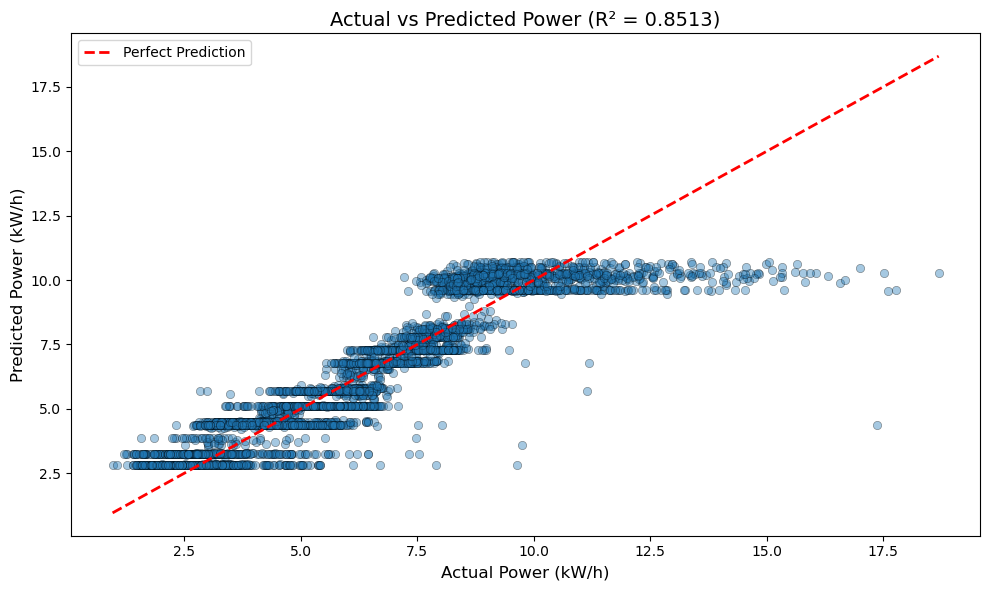

In [11]:
# Predicting on Test Data
power_preds = forest_model.predict(val_X)

# Evaluating the model
mae = mean_absolute_error(val_y, power_preds)
r2 = r2_score(val_y, power_preds)

print("=" * 50)
print("MODEL EVALUATION RESULTS")
print("=" * 50)
print(f"Mean Absolute Error (MAE) : {mae:.4f}")
print(f"R² Score                  : {r2:.4f}")
print("=" * 50)

if r2 >= 0.8:
    print("Excellent! The model explains the variance very well.")
elif r2 >= 0.6:
    print("Good. The model has decent predictive power.")
else:
    print("The model needs improvement.")

# Visualize: Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(val_y, power_preds, alpha=0.4, edgecolors='k', linewidths=0.5)
plt.plot([val_y.min(), val_y.max()], [val_y.min(), val_y.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel("Actual Power (kW/h)", fontsize=12)
plt.ylabel("Predicted Power (kW/h)", fontsize=12)
plt.title(f"Actual vs Predicted Power (R² = {r2:.4f})", fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

## Step 6: Save the Model
Save the trained model as a `.sav` file using **joblib** so it can be loaded later in the Flask web application for real-time predictions.

In [13]:
# Saving the model for future reference
model_path = "power_prediction.sav"
joblib.dump(forest_model, model_path)
print(f"Model saved successfully as '{model_path}'")

Model saved successfully as 'power_prediction.sav'
